# AIN429 ASSIGMENT 4 - b2210765024

Imported necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from numpy import where
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

Read and clean the data

In [3]:
data = pd.read_csv('data.csv', sep = ";")

In [4]:
data.isnull().sum()
data = data.dropna() # 30 rows are dropped

Understand and visualize the data

In [5]:
data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


Boxplot of features to identify outliers

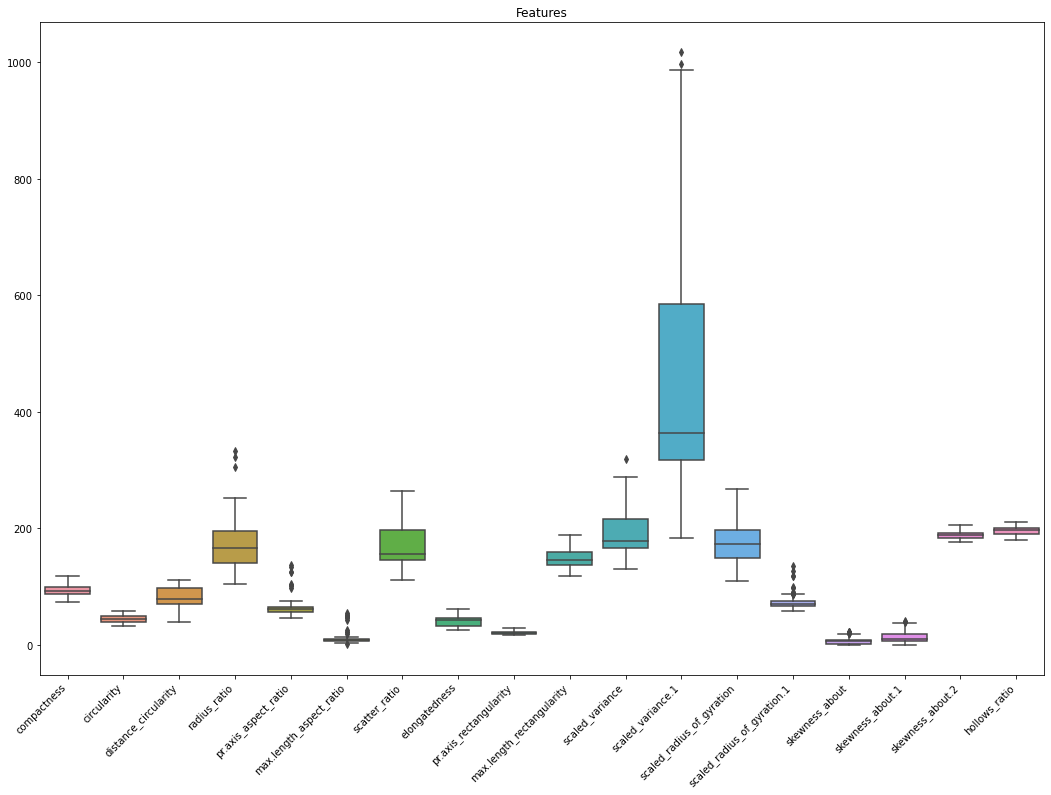

In [6]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=data,showfliers=True)
plt.title('Features')
plt.xticks(rotation=45, ha='right')
plt.show()

Correlation heatmap to identify correlations between the features, foreshadowing how will PCA work

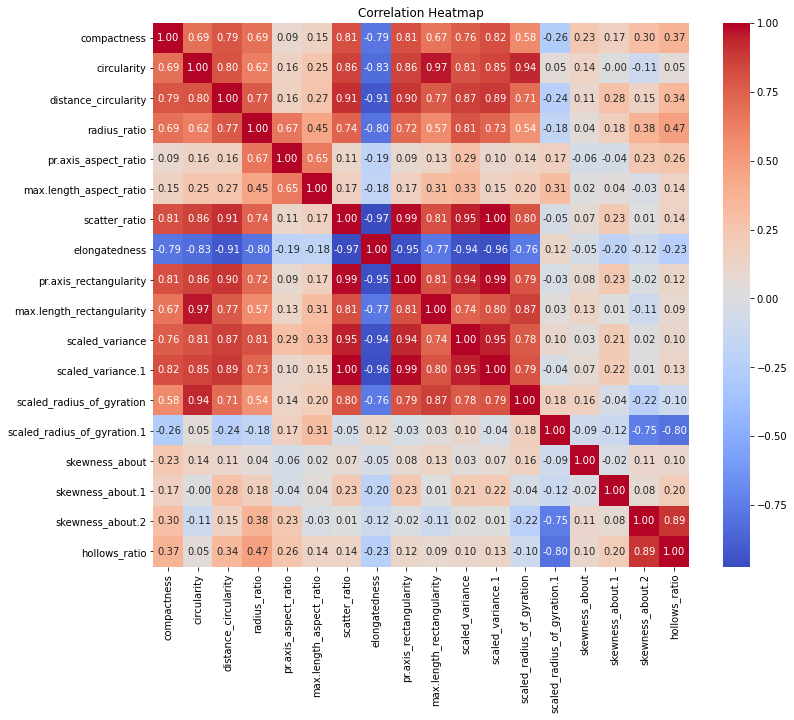

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Analysis of the EDA done on the data: 

    - Data has 18 dimensions, which brings us to curse of dimensionality. It is nearly impossible to visualize a clustered 
    18-D data. So dimensionality reduction techniques such as LDA or PCA will be applied to the data. (PCA applied)
    
    - Data has cells with different scalings; so in a possible model, features would not contribute the model equally.
    
    - Data has a lot of outliers, this might affect the clustering algorithms' performance and the performance of a possible model to be trained on the data. Thus, to fix scaling and outlier issues, scaling techniques such as Standard Scaling or MinMax Scaling will be applied to the data. (MinMax Scaling applied)
    
    - If correlation heatmap is inspected, it can be seen that there is an extreme correlation on some features, making dataset a great data to reduce dimensions. So PCA will work great on this data.


Apply dimension reduction and normalizing to data using PCA and MinMaxScaler

In [8]:
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [9]:
pca = PCA(n_components = 2)
data = pca.fit_transform(data)
norm_data = pca.fit_transform(norm_data)

In [10]:
data.shape #Dimensions successfully reduced to 2.

(813, 2)

Data before clustering

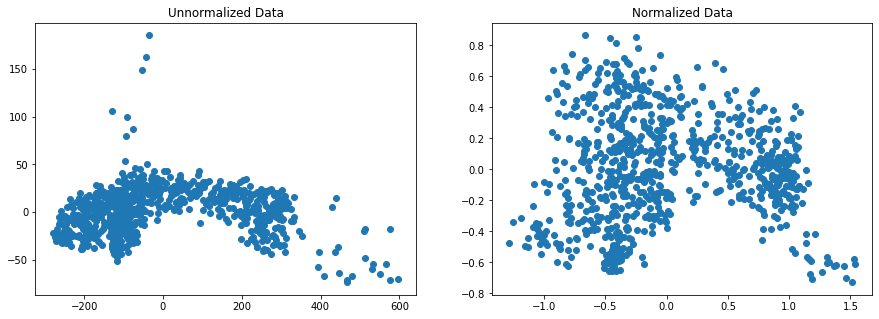

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(data[:, 0], data[:, 1], cmap='viridis')
axes[0].set_title('Unnormalized Data')

axes[1].scatter(norm_data[:, 0], norm_data[:, 1], cmap='viridis')
axes[1].set_title('Normalized Data')

plt.show()

Define a plotting function for clusters

In [12]:
def plot_clusters(yhat_data,yhat_norm_data):
    clusters_data = np.unique(yhat_data)
    clusters_norm_data = np.unique(yhat_norm_data)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))


    #Plot the unnormalized data
    for cluster in clusters_data:
        row_ix = np.where(yhat_data == cluster)
        axes[0].set_title("Unnormalized Data")
        axes[0].scatter(data[row_ix, 0], data[row_ix, 1])

    #Plot the normalized data
    for cluster_norm in clusters_norm_data:
        row_ix_norm = np.where(yhat_norm_data == cluster_norm)
        axes[1].set_title("Normalized Data")
        axes[1].scatter(norm_data[row_ix_norm, 0], norm_data[row_ix_norm, 1])

    plt.show()

Clustering Technique 1 : Centroid-based Clustering - KMeans

In [13]:
model_k_means = KMeans(n_clusters = 2, random_state = 0, n_init = "auto")

yhat_data_k_means = model_k_means.fit_predict(data)

yhat_norm_data_k_means = model_k_means.fit_predict(norm_data)

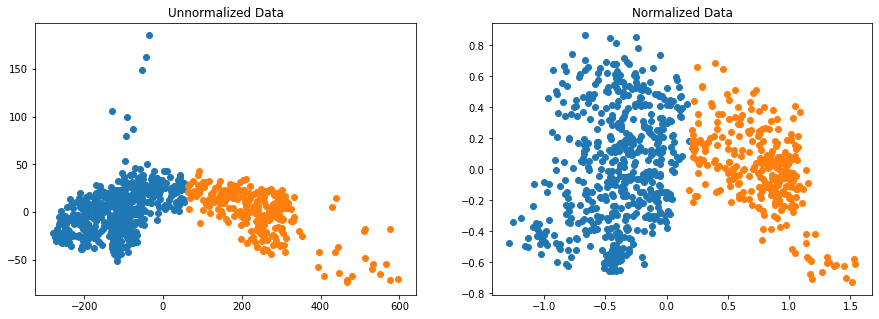

In [14]:
plot_clusters(yhat_data_k_means, yhat_norm_data_k_means)

Clustering Technique 2 : Hierarchial Clustering - Agglomerative Clustering

In [15]:
model_agg = AgglomerativeClustering(n_clusters=2)

yhat_data_agg = model_agg.fit_predict(data)
yhat_norm_data_agg = model_agg.fit_predict(norm_data)

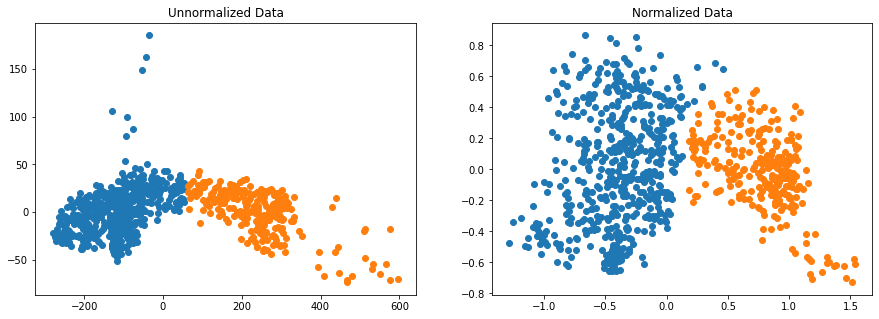

In [16]:
plot_clusters(yhat_data_agg, yhat_norm_data_agg)

Clustering Technique 3 : Density-based Spatial Clustering - DBSCAN

In [17]:
model_dbscan = DBSCAN(eps=0.1, min_samples=9) #eps hyper-parameter needs tuning

yhat_data_dbscan = model_dbscan.fit_predict(data)
yhat_norm_data_dbscan = model_dbscan.fit_predict(norm_data)

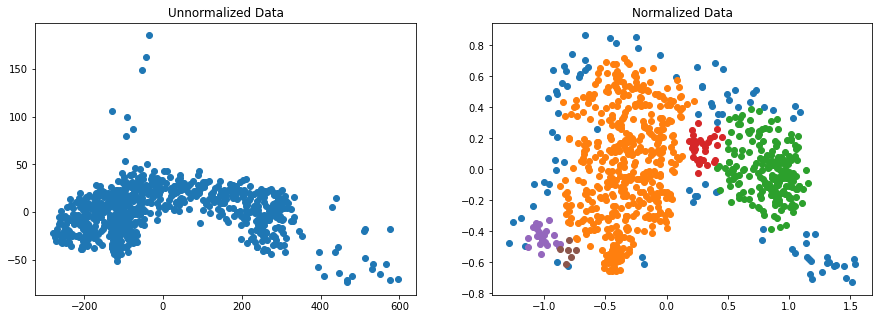

In [18]:
plot_clusters(yhat_data_dbscan, yhat_norm_data_dbscan)

Clustering Technique 3 (Second Try) : Exemplar-based Clustering - Affinity Propagation

In [19]:
model_aff = AffinityPropagation(damping=0.75) #eps hyper-parameter needs tuning

yhat_data_aff = model_aff.fit_predict(data)
yhat_norm_data_aff = model_aff.fit_predict(norm_data)

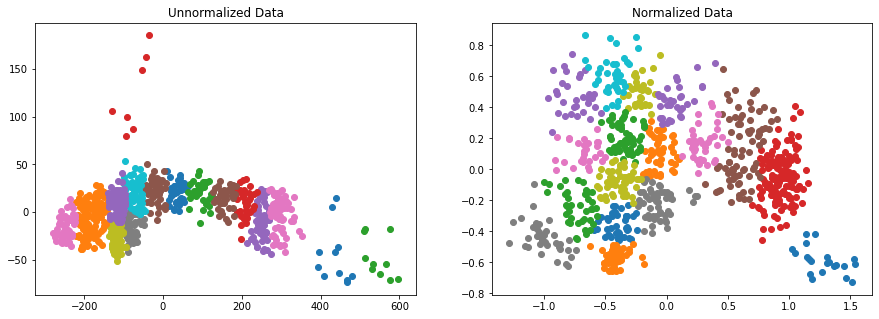

In [20]:
plot_clusters(yhat_data_aff, yhat_norm_data_aff)

Compare the models' performances using Silhouette Score Table

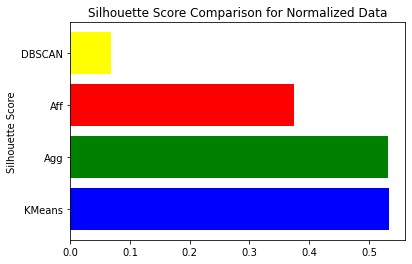

In [21]:
silhouette_kmeans_norm = silhouette_score(norm_data, yhat_norm_data_k_means)
silhouette_agg_norm = silhouette_score(norm_data, yhat_norm_data_agg)
silhouette_dbscan_norm = silhouette_score(norm_data, yhat_norm_data_dbscan)
silhouette_aff_norm = silhouette_score(norm_data, yhat_norm_data_aff)

algos = ['KMeans', 'Agg', 'Aff', 'DBSCAN']
colors = ['blue', 'green', 'red', 'yellow']
scores_norm = [silhouette_kmeans_norm, silhouette_agg_norm, silhouette_aff_norm, silhouette_dbscan_norm ]

plt.barh(algos, scores_norm, color = colors)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison for Normalized Data')
plt.show()

## Conclusion

### Overview:
In this analysis, A dataset containing information about the compactness and shape of objects has been explored. The dataset was preprocessed by handling missing values, and normalization using MinMaxScaler was applied to ensure a consistent scale for the features. Subsequently, various clustering algorithms applied to the dataset and their performance was evaluated using silhouette scores.

### Analysis on the dataset:
Descriptive Statistics: Dataset's basic statistics has been explored, including measures of central tendency and variability.

Pairwise Relationships: Correlation heatmaps were used to analyze relationships between different variables.

Outliers: Boxplots were employed to identify outliers within the dataset.

### Clustering Results:

#### KMeans Clustering:

The KMeans clustering algorithm was applied, and the dataset was separated into two clusters. Algorithm did a great job clustering the dimensions which has been reduced to 2 using PCA in both normalized and unnormalized data.

#### Agglomerative Clustering:

Agglomerative clustering, which is a hiearchial clustering algorithm was applied and had an almost identical performance with the KMeans Clustering model.

#### DBSCAN:

DBSCAN, a density-based clustering algorithm, was utilized with a specific choice of hyperparameters. Algorithm didn't even cluster the unnormalized data and had the worst performance according the silhouette scores in normalized data.

#### Affinity Propagation:

Affinity Propagation, a clustering algorithm based on message-passing between data points, was applied. The algorithm produced more than 2 clusters for both normalized and unnormalized data. It had a lower performance compared to KMeans and Agglomerative Clustering techniques and higher performance to DBScan Clustering technique.

### Recommendations:
Parameter Tuning: Fine-tuning hyperparameters for algorithms like DBSCAN and Affinity Propagation might potentially improve clustering results.

Feature Engineering: Exploring the possibility of feature engineering might enhance the performance of clustering algorithms.

In summary, this assignment gave valuable insights to clustering techniques like KMeans, Agglomerative Clustering, DBScan and Affinity Propogation Techniques. Silhouette scores has been used to compare the models' performances. It has been concluded that KMeans and Agglomerative Clustering methods has a good performance in either normalized and unnormalized data. But DBScan and Affinity Propogation's performances varies according to data's normalization and of course, hyperparameters.